1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Text(0, 0.5, '$features_3$')

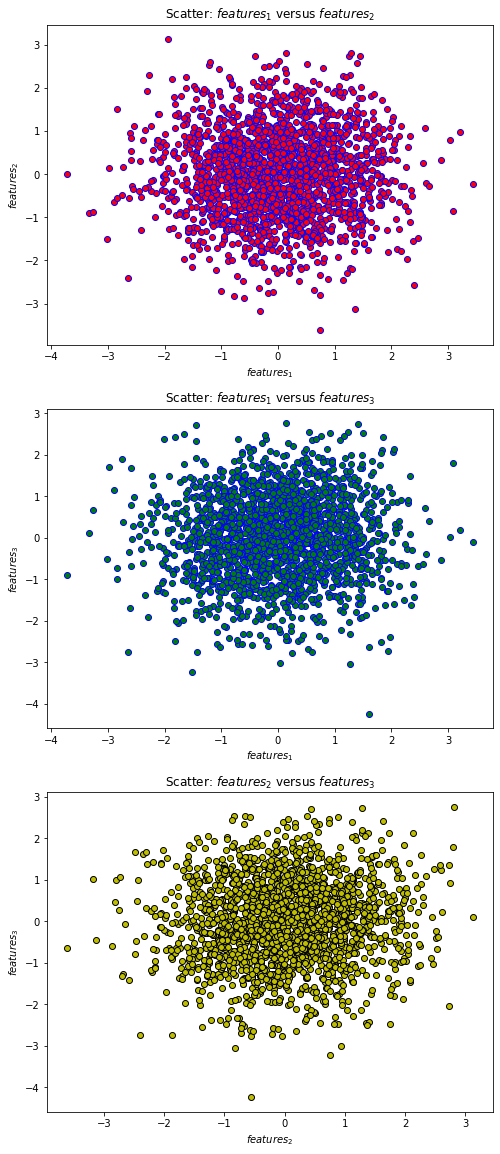

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = './data/regression_generated.csv'

df = pd.read_csv(data_file)
#df
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))

ax1.scatter(x=df['features_1'], y=df['features_2'], marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $features_1$ versus $features_2$')
ax1.set_xlabel('$features_1$')
ax1.set_ylabel('$features_2$')
                                
ax2.scatter(x=df['features_1'], y=df['features_3'], marker='o', c='g', edgecolor='b')
ax2.set_title('Scatter: $features_1$ versus $features_3$')
ax2.set_xlabel('$features_1$')
ax2.set_ylabel('$features_3$')

ax3.scatter(x=df['features_2'], y=df['features_3'], marker='o', c='y', edgecolor='k')
ax3.set_title('Scatter: $features_2$ versus $features_3$')
ax3.set_xlabel('$features_2$')
ax3.set_ylabel('$features_3$')

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

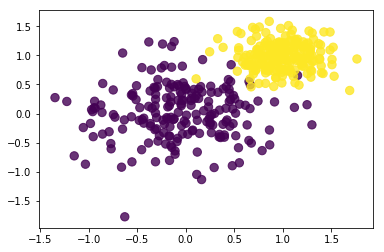

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

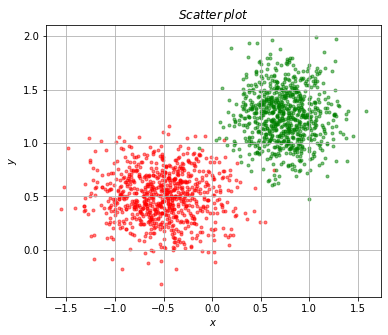

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

cov1 = np.array([[0.125, 0], [0, 0.0625]])
pts1 = np.random.multivariate_normal([-0.5, 0.5], cov1, size=800)

cov2 = np.array([[0.0625, 0], [0, 0.0625]])
pts2 = np.random.multivariate_normal([0.75, 1.25], cov2, size=800)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

ax1.scatter(x=pts1[:, 0], y=pts1[:, 1], marker='.', c='r', alpha=.5)
ax1.scatter(x=pts2[:, 0], y=pts2[:, 1], marker='.', c='g', alpha=.5)
ax1.set_title('$Scatter\, plot$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.grid()            

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
import pickle
import pandas as pd

filename = "./data/residuals_261.pkl"

unpickled = pd.read_pickle(filename).tolist()
df = pd.DataFrame.from_dict(unpickled)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [5]:
df = df[np.abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


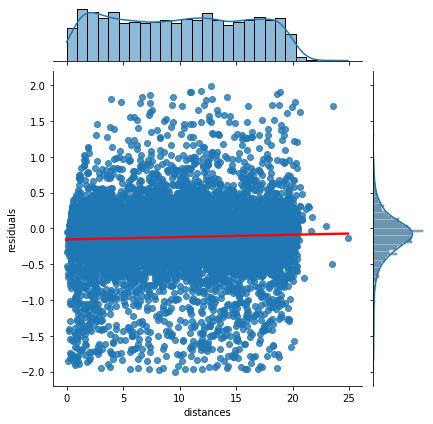

In [6]:
import seaborn as sns

sns.jointplot(x="distances", y="residuals", data=df,  kind="reg", joint_kws={'line_kws':{'color':'red'}})

In [7]:
x_borders = np.linspace(0, 20, 9)
x_centres = (x_borders[1:] + x_borders[:-1])/2 

res_digitized = np.digitize(df["distances"], x_centres)

y = [df["residuals"][res_digitized == i].mean() for i in range(1, len(x_borders))]
       
erry = [df["residuals"][res_digitized == i].std() for i in range(1, len(x_borders))]

<ErrorbarContainer object of 3 artists>

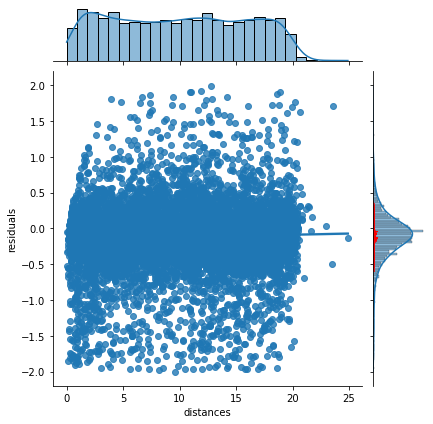

In [10]:
import matplotlib.pyplot as plt

sns.jointplot(x="distances", y="residuals", data=df,  kind="reg")
plt.errorbar(x=x_centres, y=y , yerr=erry, marker = '*', color = 'r')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


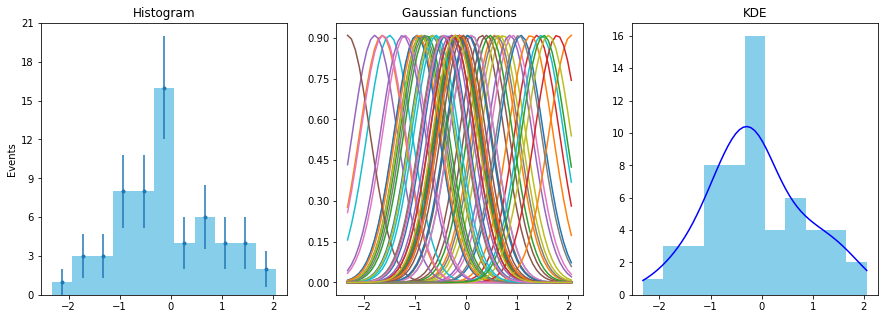

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import norm
from scipy.integrate import trapz

mean = np.random.random_sample()*np.random.randint(10)
std = np.random.random_sample()
N = np.random.randint(0, 100)
n_bins = int(N/5)

x = np.random.randn(N)*std + mean

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

bins = ax1.hist(x, bins=n_bins, color='skyblue')
ax1.set_title('Histogram')
ax1.set_ylabel('Events')
ax1.yaxis.tick_left()
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))  
error = np.sqrt(bins[0])
bins_center = (bins[1][:-1] + bins[1][1:])/2
ax1.errorbar(bins_center, bins[0], yerr=error, fmt='.')
    
std = 1.06*x.std()*(x.size**(-1/5))
x_grid = np.linspace(np.min(x), np.max(x), N)

gaussians = []
for sample in x:
    gaussian = norm.pdf(x_grid, sample, scale=std)
    gaussians.append(gaussian)
    ax2.plot(x_grid, gaussian)
    
ax2.set_title('Gaussian functions')
ax2.yaxis.tick_left()
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))  

sum_g = np.sum(gaussians, axis=0)
area_sum_g = trapz(sum_g, x_grid)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sum_g/area_hist
norm_sum_g = sum_g/k_norm

ax3.set_title('KDE')
ax3.plot(x_grid, norm_sum_g, color="blue")
ax3.hist(x, bins=n_bins, color='skyblue')
ax3.yaxis.tick_left()
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))  
